# Tugas mandiri Modul 8 Damin
Nama : Elok Fiola    
NIM: 122450051     
Kelas: RC

Buatlah sebuah analisis asosiasi dengan metode apriori dengan menggunakan data guitar.csv,
dengan menyelesaikan permasalahan dibawah ini:     

Sebuah toko guitar ingin menganalisis pola pembelian pelanggananya berdasarkan data transaksi
dari file guitar - apriori.csv dapat diakses didalam link: https://bit.ly/damin_datamodul8.

In [ ]:
#instal pip install efficient-apriori
!pip install efficient-apriori

In [ ]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import dataset
#Masukan data Market Basket Optimisation.csv yang telah diunduh.
# Ingest the data
df = pd.read_csv(main_dir + '/content/guitar - apriori.csv',
                 encoding="utf-8", header=None)

#tampilkan data frame
df

,0
0,"Nut,Saddle,Tuner"
1,"Tuning Keys,Nut,Pick Guard"
2,"Nut,Pick Guard,Fret,Pick"
3,"Bridge,Tuning Keys,Nut,Pick Guard"
4,"String Pegs,Fret,Saddle,Tuner"
...,...
96,"Bridge,Nut,Pick Guard,Saddle"
97,"String Pegs,Tuner"
98,"Pick Guard,Saddle"
99,"String,Bridge,Pick Guard,Tuner"


In [ ]:
#Import dataste
data = pd.read_csv('/content/guitar - apriori.csv')
data.columns=["Product"]
data

print("Number Of Rows is", data.shape[0])
print("Number Of Columns is", data.shape[1])

Number Of Rows is 100
Number Of Columns is 1


In [ ]:
#Data preparation
data =list(data["Product"].apply(lambda x:x.split(",")))
data

[['Tuning Keys', 'Nut', 'Pick Guard'],
 ['Nut', 'Pick Guard', 'Fret', 'Pick'],
 ['Bridge', 'Tuning Keys', 'Nut', 'Pick Guard'],
 ['String Pegs', 'Fret', 'Saddle', 'Tuner'],
 ['Saddle', 'Pick'],
 ['Tuning Keys', 'Pick Guard', 'Fret', 'Tuner'],
 ['String', 'Bridge', 'Nut', 'Saddle'],
 ['String', 'String Pegs', 'Fret', 'Tuner'],
 ['String Pegs', 'Pick Guard', 'Fret', 'Tuner'],
 ['Bridge', 'String Pegs', 'Pick Guard', 'Pick'],
 ['Fret', 'Saddle', 'Tuner'],
 ['String', 'Bridge', 'Fret', 'Tuner'],
 ['String', 'String Pegs', 'Nut', 'Pick Guard'],
 ['String', 'String Pegs', 'Tuning Keys', 'Pick Guard'],
 ['String Pegs', 'Nut', 'Fret', 'Pick'],
 ['Bridge', 'Tuning Keys', 'Pick Guard'],
 ['String', 'String Pegs', 'Tuning Keys', 'Nut'],
 ['String Pegs', 'Fret', 'Tuner'],
 ['String', 'Pick Guard', 'Fret', 'Saddle'],
 ['String', 'String Pegs'],
 ['String', 'Pick Guard', 'Pick', 'Tuner'],
 ['Saddle', 'Tuner'],
 ['Nut', 'Pick Guard', 'Saddle', 'Tuner'],
 ['String', 'Bridge', 'Saddle'],
 ['String', 'N

## Lakukan visualisasi dan transformasi data,

In [ ]:
#Transformasi data
#TransactionEncoder
te = TransactionEncoder()
te_data =te.fit_transform(data)
df =pd.DataFrame (te_data, columns= te.columns_)
df

,,Bridge,Fret,Nut,Pick,Pick Guard,Saddle,String,String Pegs,Tuner,Tuning Keys
0,False,False,False,True,False,True,False,False,False,False,True
1,False,False,True,True,True,True,False,False,False,False,False
2,False,True,False,True,False,True,False,False,False,False,True
3,False,False,True,False,False,False,True,False,True,True,False
4,False,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,False,True,False,True,False,True,True,False,False,False,False
96,False,False,False,False,False,False,False,False,True,True,False
97,False,False,False,False,False,True,True,False,False,False,False
98,False,True,False,False,False,True,False,True,False,True,False


In [ ]:
df_zero =df.replace(True,1)
df_zero

,,Bridge,Fret,Nut,Pick,Pick Guard,Saddle,String,String Pegs,Tuner,Tuning Keys
0,False,False,False,1,False,1,False,False,False,False,1
1,False,False,1,1,1,1,False,False,False,False,False
2,False,1,False,1,False,1,False,False,False,False,1
3,False,False,1,False,False,False,1,False,1,1,False
4,False,False,False,False,1,False,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,False,1,False,1,False,1,1,False,False,False,False
96,False,False,False,False,False,False,False,False,1,1,False
97,False,False,False,False,False,1,1,False,False,False,False
98,False,1,False,False,False,1,False,1,False,1,False


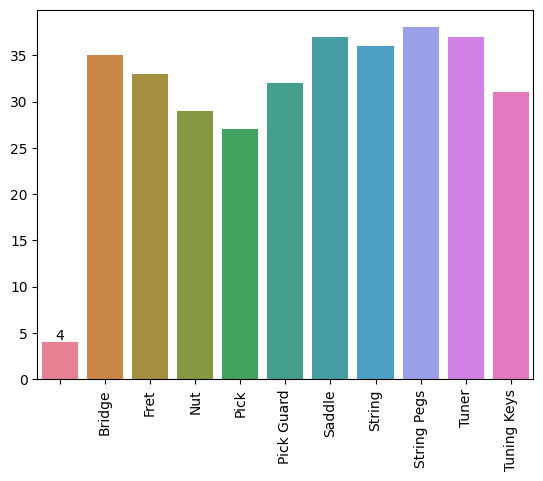

In [ ]:
#visualisasi
ax = sns.barplot(df_zero, estimator="sum", errorbar=None)
ax.bar_label(ax.containers [0], fontsize=10)
plt.xticks (rotation =90)
plt.show()

In [ ]:
#support
first = pd.DataFrame(df.sum() / df.shape[0],
                     columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
String Pegs,0.38
Saddle,0.37
Tuner,0.37
String,0.36
Bridge,0.35
Fret,0.33
Pick Guard,0.32
Tuning Keys,0.31
Nut,0.29
Pick,0.27


1. Buat asosiasi satu itemset dengan minimum suport 20%, analisis kombinasi dengan
membandingkan jika minimum supportnya dengan 30% dan 10%.

In [ ]:
#untuk pembelian di ats 20%
first [first ['Support'] >= 0.15]

,Support
String Pegs,0.38
Saddle,0.37
Tuner,0.37
String,0.36
Bridge,0.35
Fret,0.33
Pick Guard,0.32
Tuning Keys,0.31
Nut,0.29
Pick,0.27


In [ ]:
#Second Iteration
second = list(itertools.combinations (first.index, 2))
second = [list(i) for i in second]

# Sample of combinations
second

[['String Pegs', 'Saddle'],
 ['String Pegs', 'Tuner'],
 ['String Pegs', 'String'],
 ['String Pegs', 'Bridge'],
 ['String Pegs', 'Fret'],
 ['String Pegs', 'Pick Guard'],
 ['String Pegs', 'Tuning Keys'],
 ['String Pegs', 'Nut'],
 ['String Pegs', 'Pick'],
 ['String Pegs', ''],
 ['Saddle', 'Tuner'],
 ['Saddle', 'String'],
 ['Saddle', 'Bridge'],
 ['Saddle', 'Fret'],
 ['Saddle', 'Pick Guard'],
 ['Saddle', 'Tuning Keys'],
 ['Saddle', 'Nut'],
 ['Saddle', 'Pick'],
 ['Saddle', ''],
 ['Tuner', 'String'],
 ['Tuner', 'Bridge'],
 ['Tuner', 'Fret'],
 ['Tuner', 'Pick Guard'],
 ['Tuner', 'Tuning Keys'],
 ['Tuner', 'Nut'],
 ['Tuner', 'Pick'],
 ['Tuner', ''],
 ['String', 'Bridge'],
 ['String', 'Fret'],
 ['String', 'Pick Guard'],
 ['String', 'Tuning Keys'],
 ['String', 'Nut'],
 ['String', 'Pick'],
 ['String', ''],
 ['Bridge', 'Fret'],
 ['Bridge', 'Pick Guard'],
 ['Bridge', 'Tuning Keys'],
 ['Bridge', 'Nut'],
 ['Bridge', 'Pick'],
 ['Bridge', ''],
 ['Fret', 'Pick Guard'],
 ['Fret', 'Tuning Keys'],
 ['Fret',

In [ ]:
#Mencari nilai value dan mengeliminasi dari nilai support
value = []
for i in range(0, len(second)):
  temp = df.T.loc[second[i]].sum()
  temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
  value.append(temp)

# Create a data frame
secondIteration = pd.DataFrame (value, columns = ["Support"])
secondIteration ["index"] = [tuple (i) for i in second]
secondIteration ['length'] = secondIteration ['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending=False)

#Elimination by Support Value
secondIteration

,Support,length
index,,
"(Tuner, Fret)",0.15,2
"(Tuner, String)",0.15,2
"(String Pegs, Saddle)",0.13,2
"(String Pegs, Fret)",0.13,2
"(String Pegs, String)",0.12,2
"(Pick Guard, Tuning Keys)",0.12,2
"(Bridge, Tuning Keys)",0.12,2
"(String Pegs, Tuning Keys)",0.12,2
"(Bridge, Pick Guard)",0.12,2


In [ ]:
df_second=pd.DataFrame()
df_second.insert(0, "Name Product", tuple (second))
df_second.insert(1, "Support", [0.15,0.15,
                                0.13, 0.13,
                                0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,
                                0.11, 0.11, 0.11, 0.11, 0.11,
                                0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
                                0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
                                0.08, 0.08, 0.08, 0.08, 0.08,
                                0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
                                0.06, 0.06,
                                0.05, 0.05,
                                0.01, 0.01, 0.01, 0.01,
                                0.00, 0.00, 0.00, 0.00, 0.00, 0.00])
df_second

,Name Product,Support
0,"[String Pegs, Saddle]",0.15
1,"[String Pegs, Tuner]",0.15
2,"[String Pegs, String]",0.13
3,"[String Pegs, Bridge]",0.13
4,"[String Pegs, Fret]",0.12
5,"[String Pegs, Pick Guard]",0.12
6,"[String Pegs, Tuning Keys]",0.12
7,"[String Pegs, Nut]",0.12
8,"[String Pegs, Pick]",0.12
9,"[String Pegs, ]",0.12


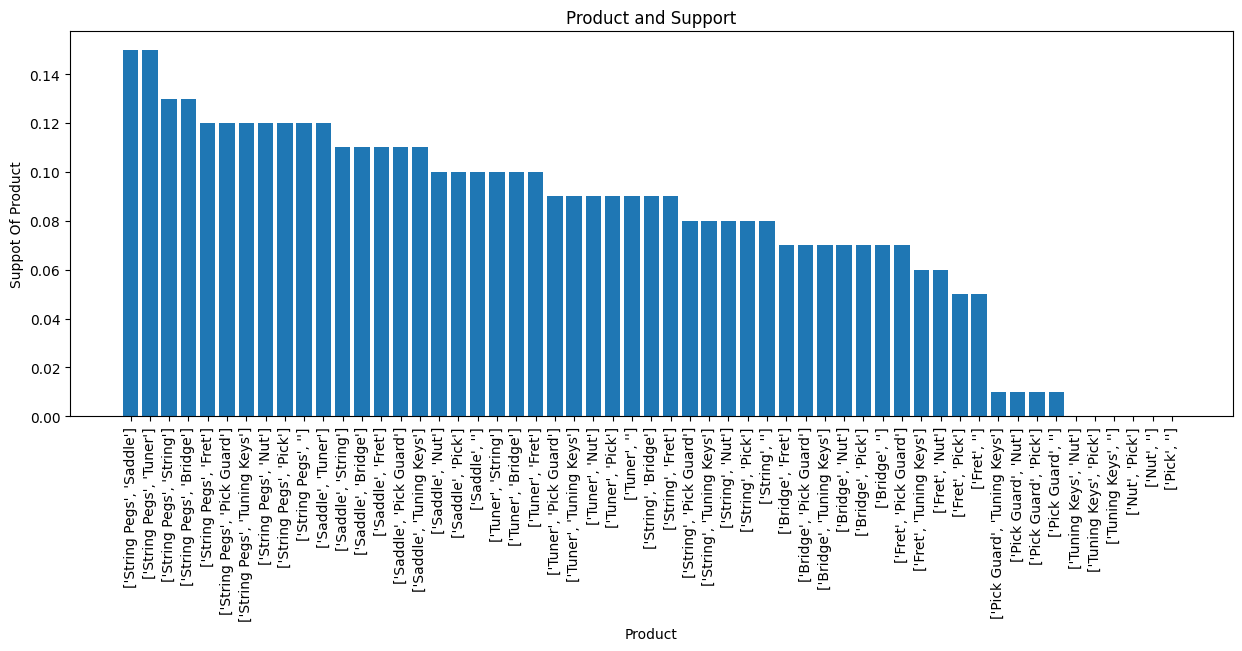

In [ ]:
plt.figure(figsize = (15,5))
x = range(55)
y =df_second ["Support"]
labels = [second]

plt.bar(x,y)
plt.xticks (x, labels[0], rotation =90)
plt.title("Product and Support")
plt.xlabel("Product")
plt.ylabel("Suppot Of Product")
plt.show()

In [ ]:
#Iterasi pertama
def ar_iterations(data, num_iter=1, support_value=0.1, iterationIndex=None):
    # Function to calculate support and filter by support_value
    def ar_calculation(iterationIndex=iterationIndex):
        value = []  # Calculation of support value
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum()
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)

        # Bind results
        result = pd.DataFrame(value, columns=["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x: len(x))
        result = result.set_index("index").sort_values("Support", ascending=False)

        # Elimination by Support Value
        result = result[result.Support > support_value]  # Using support_value from function parameter
        return result

    # First Iteration first
    first = pd.DataFrame(data.T.sum(axis=1) / data.shape[0], columns=["Support"]).sort_values("Support", ascending=False)
    first = first[first.Support > support_value]  # Using support_value from function parameter
    first["length"] = 1

    if num_iter == 1:
        res = first.copy()
    # Second Iteration
    elif num_iter == 2:
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    return res  # Returning the result

# Call the function with the desired parameters.
# Example: setting minimum support to 0.2
result_df = ar_iterations(df, num_iter=1, support_value=0.2)
print(result_df)

             Support  length
String Pegs     0.38       1
Saddle          0.37       1
Tuner           0.37       1
String          0.36       1
Bridge          0.35       1
Fret            0.33       1
Pick Guard      0.32       1
Tuning Keys     0.31       1
Nut             0.29       1
Pick            0.27       1


1. Buat asosiasi satu itemset dengan minimum suport 20%, analisis kombinasi dengan
membandingkan jika minimum supportnya dengan 30% dan 10%.

In [ ]:
#Iterasi sup=20%
iteration11 = ar_iterations(df, num_iter = 1, support_value=0.2)
iteration11

#10 data

,Support,length
String Pegs,0.38,1
Saddle,0.37,1
Tuner,0.37,1
String,0.36,1
Bridge,0.35,1
Fret,0.33,1
Pick Guard,0.32,1
Tuning Keys,0.31,1
Nut,0.29,1
Pick,0.27,1


In [ ]:
#Iterasi sup=30%
iteration12 = ar_iterations(df, num_iter = 1, support_value=0.3)
iteration12

#8 data

,Support,length
String Pegs,0.38,1
Saddle,0.37,1
Tuner,0.37,1
String,0.36,1
Bridge,0.35,1
Fret,0.33,1
Pick Guard,0.32,1
Tuning Keys,0.31,1


In [ ]:
#Iterasi sup=10%
iteration13 = ar_iterations(df, num_iter = 1, support_value=0.10)
iteration13

#10 data

,Support,length
String Pegs,0.38,1
Saddle,0.37,1
Tuner,0.37,1
String,0.36,1
Bridge,0.35,1
Fret,0.33,1
Pick Guard,0.32,1
Tuning Keys,0.31,1
Nut,0.29,1
Pick,0.27,1


Dapat disimpulkan pada asosiasi satu datase, barang lebih sering dibeli ketika supportnya lebih kecil

2. Buat asosiasi dua itemset dengan minimum suport 10%, analisis kombinasi dengan
membandingkan jika minimum supportnya dengan 15% dan 5%.

In [ ]:
#Iterasi sup=10%
iteration21 = ar_iterations(df, num_iter = 2, support_value=0.10)
iteration21

#16 kom

,Support,length
index,,
"(Tuner, Fret)",0.15,2
"(Tuner, String)",0.15,2
"(String Pegs, Saddle)",0.13,2
"(String Pegs, Fret)",0.13,2
"(Pick Guard, Tuning Keys)",0.12,2
"(Bridge, Tuning Keys)",0.12,2
"(String Pegs, Tuner)",0.12,2
"(Bridge, Pick Guard)",0.12,2
"(Saddle, Nut)",0.12,2


In [ ]:
#Iterasi sup=15%
iteration22 = ar_iterations(df, num_iter =2, support_value=0.15)
iteration22

#0 kom

,Support,length
index,,


In [ ]:
#Iterasi sup=5%
iteration23 = ar_iterations(df, num_iter =2, support_value=0.05)
iteration23



,Support,length
index,,
"(Tuner, Fret)",0.15,2
"(Tuner, String)",0.15,2
"(String Pegs, Saddle)",0.13,2
"(String Pegs, Fret)",0.13,2
"(Pick Guard, Tuning Keys)",0.12,2
"(Bridge, Tuning Keys)",0.12,2
"(String Pegs, Tuner)",0.12,2
"(Bridge, Pick Guard)",0.12,2
"(Saddle, Nut)",0.12,2


Dapat disimpulkan pada asosiasi dua dataset, barang lebih sering dibeli ketika supportnya lebih kecil pada 5% atau 10%

Buat asosiasi tiga itemset dengan minimum suport 4%, analisis kombinasi dengan
membandingkan jika minimum supportnya dengan 5% dan 3%.

In [ ]:
#Iterasi sup=4%
iteration31 = ar_iterations(df, num_iter=3, support_value=0.04, iterationIndex = iteration21.index)
iteration31

,Support,length
index,,
"(Bridge, Tuner, String)",0.06,3
"(Tuner, Fret, String Pegs)",0.05,3
"(String Pegs, Pick Guard, Tuning Keys)",0.05,3
"(Fret, String Pegs, Saddle)",0.05,3
"(Bridge, Pick Guard, Tuning Keys)",0.05,3


In [ ]:
#Iterasi sup=5%
iteration32 = ar_iterations(df, num_iter=3, support_value=0.05, iterationIndex = iteration22.index)
iteration32

,Support,length
index,,


In [ ]:
#Iterasi sup=3%
iteration33 = ar_iterations(df, num_iter=3, support_value=0.04, iterationIndex = iteration23.index)
iteration33

,Support,length
index,,
"(Bridge, Tuner, String)",0.06,3
"(Tuner, Pick, String)",0.05,3
"(String Pegs, Pick Guard, Tuning Keys)",0.05,3
"(Fret, String Pegs, Saddle)",0.05,3
"(Tuner, Fret, String Pegs)",0.05,3
"(Bridge, Pick Guard, Tuning Keys)",0.05,3


Dapat disimpulkan pada asosiasi tiga dataset, barang lebih sering dibeli ketika supportnya lebih kecil yaitu 3%

In [ ]:
#Iterasi sup=0.9%
iteration41 = ar_iterations(df, num_iter=4, support_value=0.0009, iterationIndex = iteration31.index)
iteration41

,Support,length
index,,
"(Bridge, Tuner, String, Pick Guard)",0.02,4
"(Bridge, Tuner, Fret, String Pegs)",0.01,4
"(Bridge, Fret, Saddle, String)",0.01,4
"(String Pegs, String, Pick Guard, Tuning Keys)",0.01,4
"(Fret, Saddle, String, Pick Guard)",0.01,4
"(Fret, String Pegs, Pick Guard, Tuning Keys)",0.01,4
"(Fret, String Pegs, Saddle, String)",0.01,4
"(Tuner, String Pegs, Pick Guard, Tuning Keys)",0.01,4
"(Tuner, String Pegs, Saddle, String)",0.01,4


In [ ]:
#Iterasi sup=0.89%
iteration42 = ar_iterations(df, num_iter=4, support_value=0.0089, iterationIndex = iteration32.index)
iteration42

,Support,length
index,,


In [ ]:
#Iterasi sup=1%
iteration43 = ar_iterations(df, num_iter=4, support_value=0.01, iterationIndex = iteration33.index)
iteration43

,Support,length
index,,
"(Bridge, Tuner, String, Pick Guard)",0.02,4


Dapat disimpulkan pada asosiasi empat dataset, barang lebih sering dibeli ketika supportnya 0,9%